[【Python】金利データの取得](https://note.com/hippen/n/n45aace7102b4)

In [60]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

import datetime
import pandas_datareader.data as web
import matplotlib.pyplot as plt

# yahoo finance連携用モジュール
!pip install yfinance
import yfinance as yf

distutils: /usr/local/lib/python3.8/dist-packages
sysconfig: /usr/lib/python3.8/site-packages
distutils: /usr/local/lib/python3.8/dist-packages
sysconfig: /usr/lib/python3.8/site-packages
distutils: /usr/local/include/python3.8/UNKNOWN
sysconfig: /usr/include/python3.8/UNKNOWN
distutils: /usr/local/bin
sysconfig: /usr/bin
distutils: /usr/local
sysconfig: /usr
user = False
home = None
root = None
prefix = None
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.


# FREDから金利情報等を入手

## 金利情報

政策金利情報: [FRB Rates - discount, fed funds, primary credit](https://fred.stlouisfed.org/categories/118)
[Effective Federal Funds Rate](https://fred.stlouisfed.org/series/FF)

- [政策金利 (Effective Federal Funds Rate)](https://fred.stlouisfed.org/categories/118): `FF`


名目・実質金利情報: [Treasury Constant Maturity](https://fred.stlouisfed.org/categories/115)

- 名目金利 (Constant Maturity Treasury, CMT) : `DGS2`, `DGS5`など`DGS`と年数のTicker名。1monthから30yearsまである。
- 実質金利 (Treasury Inflation-Indexed Security, Constant Maturity): `DFII5`, `DFII10`など`DFII`と年数のTicker名

## インフレ率

[Insterest Rate Spreads](https://fred.stlouisfed.org/categories/33446)から入手
- 期待インフレ率(Break Even Inflation Rate, BEI): `T10YIE`など`T`のあとに年数。付きデータが有るときには`T20YIEM`など最後に`M`がつく
- 金利差(10年名目金利-2年名目金利): `T10Y2Y`

In [187]:
def get_stock_data(start, end, codelist):
  data = yf.download(codelist, start, end)

#  display(data)
  return data["Adj Close"] # Adjusted Close (配当込み，分割調整値)

def plot(df,xlim=None,ylabel=""):
    df=df.rename(columns=yields).dropna()
    
    df.plot(figsize=(14, 5), fontsize=15, linewidth=2, alpha=0.8, xlim=["2013-01-01","2018-01-01"])
    plt.legend(fontsize=11)
#    plt.title("Yields", fontsize=45)

    plt.axhline(y=0, color="gray", linewidth=2)
    plt.xlabel("")
    plt.ylabel(ylabel, fontsize=30)
    plt.xticks(rotation = 90)
    plt.minorticks_on()
    plt.grid(which = 'major', ls = '-')
    plt.grid(which = 'minor', ls = 'dashed')
    
    plt.axvline(x="2013-06-19", linewidth=1, color='b', ls="--", alpha=0.8)

    plt.axvline(x="2014-01-01", linewidth=1, color='r', ls="--", alpha=0.8)
    plt.axvline(x="2014-10-29", linewidth=1, color='r', ls="--", alpha=0.8)
    
    
    plt.show()

yields = {
    "FF": "Effective Federal Funds Rate",
    "DGS1": "1-Year Constant",
    "DGS2": "2-Year Constant",
    "DGS5": "5-Year Constant",
    "DGS10": "10-Year Constant",
    "DGS30": "30-Year Constant",
    "DFII5": "5-Year Inflation-Indexed",
    "DFII10": "10-Year Inflation-Indexed",
    "DFII30": "30-Year Inflation-Indexed",
    "T10YIE": "10-Year Inflation",
    "T20YIEM": "20-Year Inflation",
    "T10Y2Y": "10-Year - 2 Year",
    "GOLD": "GOLD",
    "SPY": "SPY",
    "QQQ": "QQQ"
}    

In [179]:
# start = datetime.date.today() - datetime.timedelta(days=1000)
start = datetime.date(2001, 1, 1)
end = datetime.date.today()

yields = ["FF", "DGS2", "DGS5", "DGS10", "DGS30", "DFII5", "DFII10", "DFII30","T10Y2Y"]

data = web.DataReader(yields, "fred", start, end)
data=data.fillna(method='ffill')

In [118]:
stocks=get_stock_data(start,end,["GC=F","SPY","QQQ"])

[*********************100%***********************]  3 of 3 completed


In [183]:
stock_ratio=stocks["2013":].apply(lambda x: x/x[0])

df=pd.concat([data,stock_ratio],axis=1)

Yosshiさんの真似をして2013年から2018金利の推移のグラフを作ってみました。SPY, QQQのデータもいれてます。ただし，SPY,QQQは2013年1月の株価を1としています。
縦の青点線がテーバリング予告(2013/6/19), 縦の2つの赤点線がテーパリング開始と終了(2014年の1月と10月)。
テーパリング予告

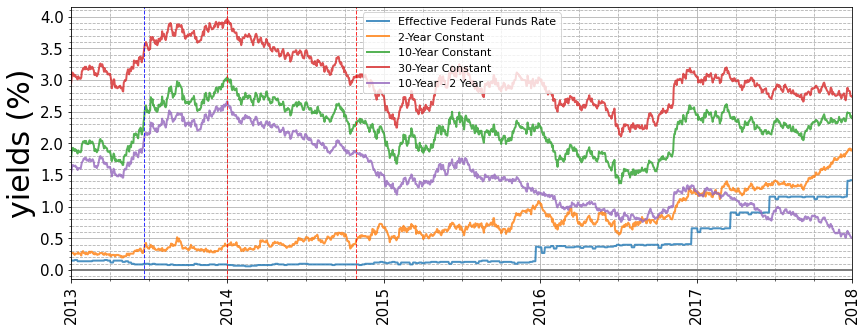

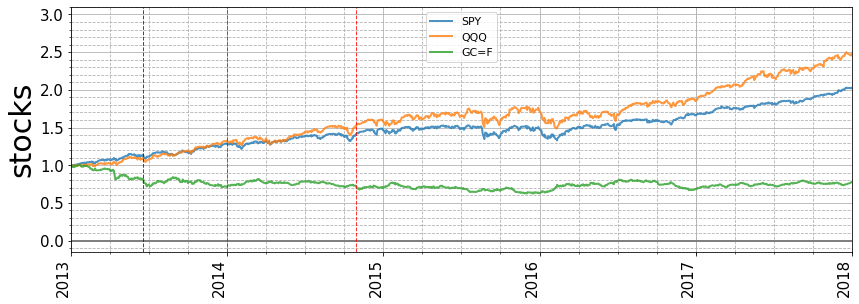

In [188]:
target=["FF", "DGS2", "DGS10","DGS30","T10Y2Y"]
plot(df[target]["2013":"2017"],ylabel="yields (%)")

target=["SPY", "QQQ", "GC=F"]
plot(df[target]["2013":"2018"],ylabel="stocks")

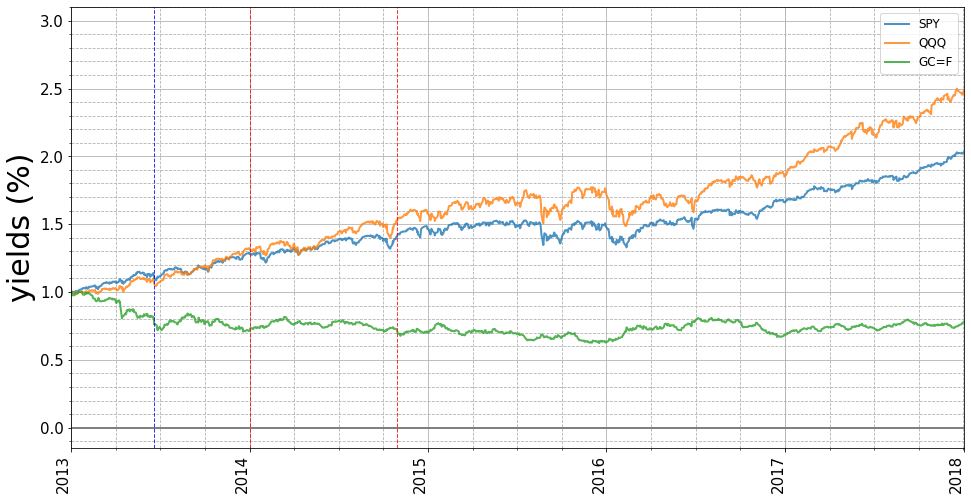